## **SOLO LO HICE PARA PCA**

In [2]:
from scripts.cargar_datos_cifar import clases_cifar
from scripts.ver_umap import visualizar_umap

# **PATHS**

In [3]:
from pathlib import Path

cifar100_path = Path("../datos/cifar-10-batches-py")
resultados_path = Path("../resultados/05-ISOMAP")

# **CLASES E HIPERPARÁMETROS**

In [4]:
clases = ['bird', 'automobile', 'cat', 'deer']

In [5]:
neighbors_to_test = [5, 10, 100, 1000]

# **CORRERLO**

In [6]:
X, y, fine_label_names, data_dict, meta_dict = clases_cifar(cifar100_path, clases)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import Isomap
import os
import time

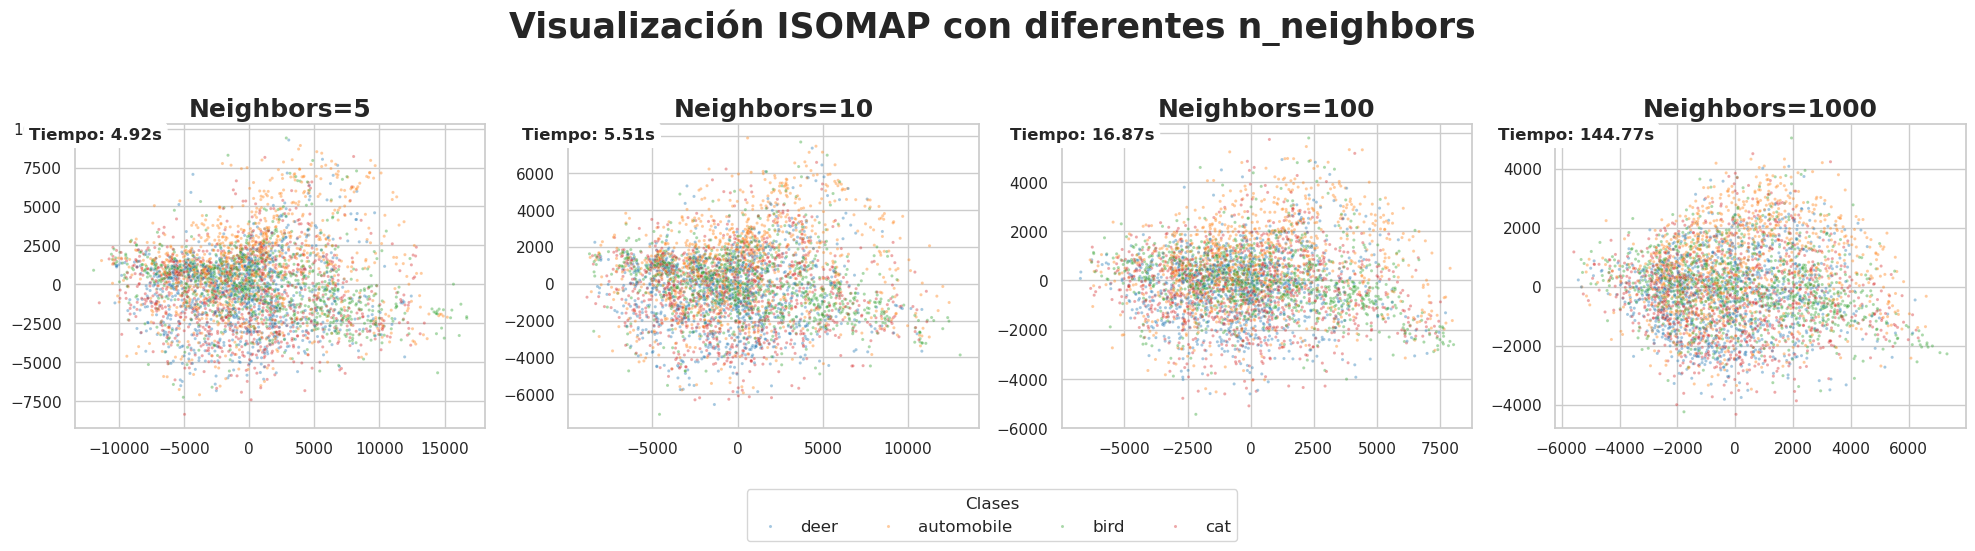

In [11]:
fig, axes = plt.subplots(1, len(neighbors_to_test), figsize=(20, 5))
fig.suptitle('Visualización ISOMAP con diferentes n_neighbors', fontsize=25, weight='bold')

for i, n_neighbors in enumerate(neighbors_to_test):

    # Iniciar el cronómetro
    start_time = time.time()

    # Crear un modelo ISOMAP
    isomap_model = Isomap(
        n_components=2,
        n_neighbors=n_neighbors
    )

    # Ajustar el modelo ISOMAP a los datos
    X_isomap_2 = isomap_model.fit_transform(X)

    # Detener el cronómetro y calcular el tiempo de ejecución
    end_time = time.time()
    execution_time = end_time - start_time

    # Crear un DataFrame para la visualización
    df_isomap = pd.DataFrame({
        'x_1': X_isomap_2[:, 0],
        'x_2': X_isomap_2[:, 1],
        'Clase': [fine_label_names[k] for k in y]
    })

    # Crear un gráfico de dispersión
    ax = axes[i]
    sns.scatterplot(
        data=df_isomap,
        x='x_1',
        y='x_2',
        hue='Clase',
        alpha=0.4,
        ax=ax,
        s=5
    )

    # Configurar el gráfico
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend().set_visible(False)
    ax.grid(True)
    # No es común fijar los límites en t-SNE ya que las escalas pueden variar significativamente
    # ax.set_xlim(-6, 12)
    # ax.set_ylim(-4, 12)

    # Añadir el tiempo de ejecución como una anotación
    ax.annotate(f'Tiempo: {execution_time:.2f}s',
                xy=(0.05, 0.95),  # Coordenadas donde colocar la anotación (x, y) - esquina superior izquierda
                xycoords='axes fraction', # Sistema de coordenadas (fracciones del eje)
                fontsize=12,
                ha='center',        # Alineación horizontal
                weight='bold',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white"))

# Añadir etiquetas en los bordes para mejor claridad
for ax, neighbors in zip(axes, neighbors_to_test):
    ax.set_title(f'Neighbors={neighbors}', fontsize=18, weight='bold')

# Añadir una leyenda común al final
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(fine_label_names), fontsize=12, bbox_to_anchor=(0.5, -0.1), bbox_transform=fig.transFigure, title="Clases")


plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Ajustar para que no se superpongan los títulos y la leyenda

# Guardar la figura
plt.savefig(os.path.join(resultados_path, 'comparacion-neighbors-3.svg'), format='svg', bbox_inches='tight')

plt.show()